### Regularized modals as Embedded Methods

#### Feature Selection using Linear Models

##### Feature Selection using LASSO Regression

In [3]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [5]:
X_train.shape

(614, 8)

In [6]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29


In [7]:
# Working with Linear Models, always convert your data on same scale ---- using StandardScaler

from sklearn.preprocessing import StandardScaler

cols = X_train.columns

scaler = StandardScaler()
# fit_transform() - Standardizing the data(i.e., Standard Normal Variation) using fit & apply transformation
X_train_scaled = scaler.fit_transform(X_train)
# transform() -- mean centering --- in scaling only
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,columns=cols)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=cols)

In [8]:
X_train_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.516591,0.750524,0.564756,1.652015,0.437496,0.795825,0.529526,0.567932
1,1.812018,0.244752,-0.347904,1.020973,-0.678474,1.228654,-0.069689,0.398450
2,0.925736,-0.608739,0.260536,1.273390,0.222886,0.704013,-0.794249,0.991638
3,1.221164,-0.039745,0.463350,-1.250779,-0.678474,-0.896139,-0.167519,2.601722
4,-0.551400,-0.039745,0.361943,1.084077,0.222886,1.031914,-0.760619,-0.364222


In [9]:
# 1.Regularization Term -- alpha=0.01

from sklearn.linear_model import Lasso

# Regularization Term -- alpha
lasso = Lasso(alpha=0.01)

# training model
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.01)

In [10]:
lasso.coef_

array([ 6.26290474e-02,  1.85968700e-01, -3.50258983e-02, -0.00000000e+00,
       -1.62558777e-04,  8.51781764e-02,  2.83810683e-02,  1.84611338e-02])

<Axes: >

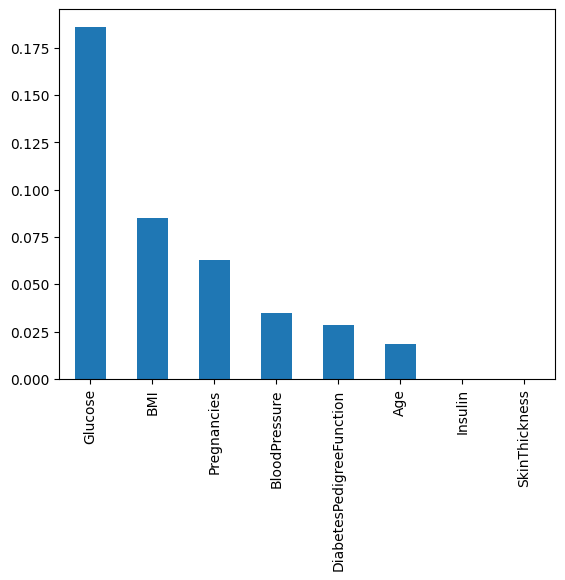

In [11]:
# plotting coefficient in descending order

import matplotlib.pyplot as plt
import numpy as np

x = pd.Series(np.abs(lasso.coef_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

In [12]:
# 2.Regularization Term -- alpha=0.1 --- increasing alpha, regularization becomes stronger

from sklearn.linear_model import Lasso

# Regularization Term -- alpha
lasso = Lasso(alpha=0.1)

# training model
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [13]:
lasso.coef_

array([ 0.        ,  0.1267733 , -0.        ,  0.        ,  0.        ,
        0.00480181,  0.        ,  0.        ])

<Axes: >

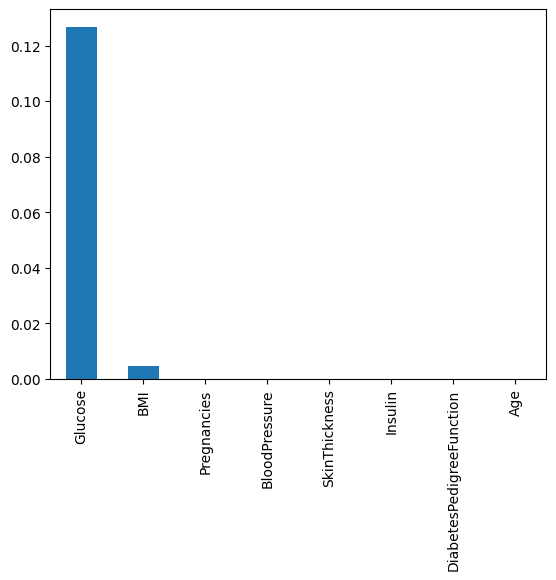

In [14]:
# plotting coefficient in descending order

import matplotlib.pyplot as plt
import numpy as np

x = pd.Series(np.abs(lasso.coef_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

#### Feature Selection using Non-Linear Models

##### Feature Selection using Decision Tree

In [40]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [43]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29


In [55]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

# Training model
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
dt.feature_importances_

array([0.087036  , 0.26765376, 0.12799405, 0.04156801, 0.03562626,
       0.17135603, 0.11121496, 0.15755093])

<Axes: >

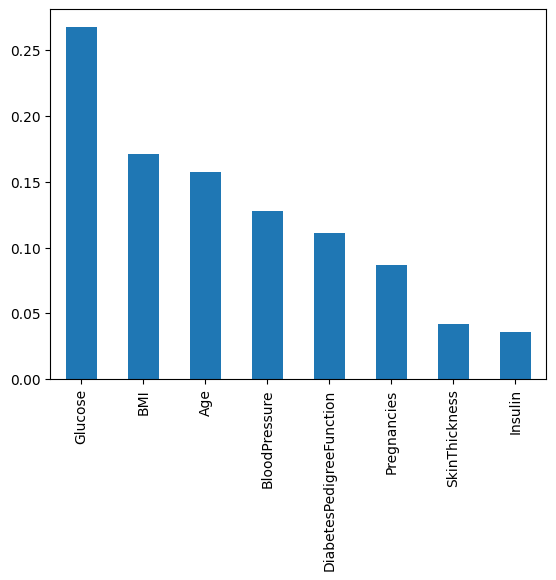

In [57]:
x = pd.Series(np.abs(dt.feature_importances_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

##### Feature Selection using Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# training model
rf.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
rf.feature_importances_

array([0.09119244, 0.24206335, 0.09290186, 0.06826077, 0.08430642,
       0.16233593, 0.12486596, 0.13407328])

<Axes: >

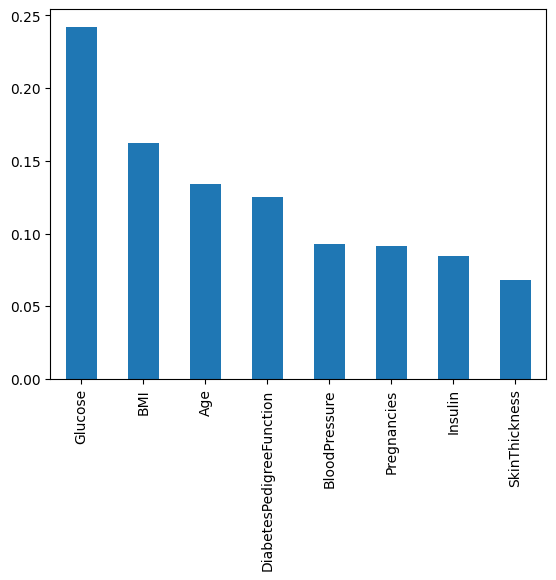

In [54]:
x = pd.Series(np.abs(rf.feature_importances_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

#### SelectFromModel -- Transformer(thing that can make changes) in sklearn --- Apply Embedded Techniques to do Feature Engineering.

In [58]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [59]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [60]:
from sklearn.feature_selection import SelectFromModel
# if feature_importance of any column is less that 0.1 -- drop them
sfm = SelectFromModel(model, threshold=0.1)

In [63]:
# training transformer not decision tree -- this train decision tree inside & check the feature importance -- Embedded method
sfm.fit(X_train, y_train)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold=0.1)

In [66]:
# below are the cols whose feature importance is greater than 0.1
sfm.get_support(indices=True)

array([1, 2, 5, 6, 7])

In [67]:
sfm.feature_names_in_[sfm.get_support(indices=True)]

array(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction',
       'Age'], dtype=object)

In [68]:
X_train_trans = sfm.transform(X_train)

X_train_trans = pd.DataFrame(X_train_trans,columns=sfm.feature_names_in_[sfm.get_support(indices=True)])

X_train_trans

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,145.0,80.0,37.9,0.637,40.0
1,129.0,62.0,41.2,0.441,38.0
2,102.0,74.0,37.2,0.204,45.0
3,120.0,78.0,25.0,0.409,64.0
4,120.0,76.0,39.7,0.215,29.0
...,...,...,...,...,...
609,157.0,74.0,39.4,0.134,30.0
610,187.0,50.0,33.9,0.826,34.0
611,126.0,90.0,43.4,0.583,42.0
612,171.0,72.0,43.6,0.479,26.0
